# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Food Nutrition Dataset](https://www.kaggle.com/datasets/sonalshinde123/food-nutrition-dataset-150-everyday-foods/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Food_Nutrition_Dataset.csv')

### Frist five row

In [3]:
df.head()

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9


### last Five row

In [4]:
df.tail()

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
200,"Garlic bread, with parmesan cheese, from fast ...",Yeast breads,351.0,8.76,41.06,16.80,2.99,0.2
201,"Garlic bread, with melted cheese, from fast fo...",Yeast breads,339.0,11.41,34.21,17.34,2.48,0.2
202,"Fast foods, breadstick, soft, prepared with ga...",Fast Foods,1430.0,12.20,44.50,12.90,4.65,0.0
203,"HORMEL ALWAYS TENDER, Pork Loin Filets, Lemon ...",Pork Products,492.0,17.80,1.79,4.16,0.60,1.7
204,"Abiyuch, raw",Fruits and Fruit Juices,290.0,1.50,17.60,0.10,1.61,54.1


### Shape of our dataset

In [5]:
df.shape

(205, 8)

### List out all columns

In [6]:
df.columns

Index(['food_name', 'category', 'calories', 'protein', 'carbs', 'fat', 'iron',
       'vitamin_c'],
      dtype='object')

### Datatype of each columns

In [7]:
df.dtypes

food_name     object
category      object
calories     float64
protein      float64
carbs        float64
fat          float64
iron         float64
vitamin_c    float64
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   food_name  205 non-null    object 
 1   category   205 non-null    object 
 2   calories   205 non-null    float64
 3   protein    205 non-null    float64
 4   carbs      205 non-null    float64
 5   fat        205 non-null    float64
 6   iron       203 non-null    float64
 7   vitamin_c  202 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.9+ KB


### Check Null Value

In [9]:
df.isnull().sum()

food_name    0
category     0
calories     0
protein      0
carbs        0
fat          0
iron         2
vitamin_c    3
dtype: int64

### Replace Null Value with Mean

In [10]:
df[['iron', 'vitamin_c']] = df[['iron', 'vitamin_c']].fillna(df[['iron', 'vitamin_c']].mean())

In [11]:
df.isnull().sum()

food_name    0
category     0
calories     0
protein      0
carbs        0
fat          0
iron         0
vitamin_c    0
dtype: int64

## Check Duplicate Value

In [12]:
df.duplicated().sum()

np.int64(0)

# EDA

In [13]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

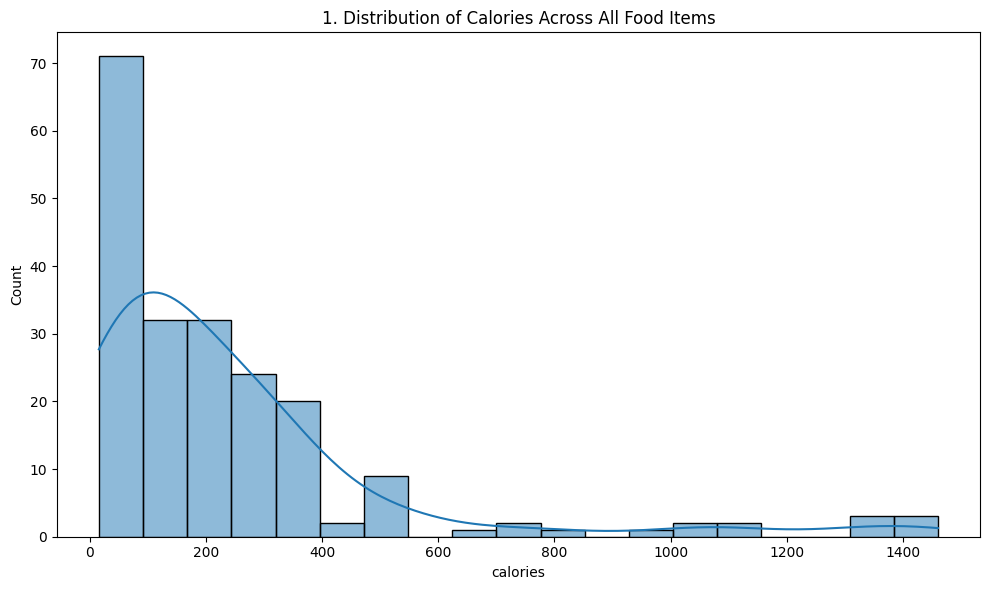

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['calories'], kde=True)
plt.title(f'{plot_no}. Distribution of Calories Across All Food Items')
show_fig()
plot_no += 1


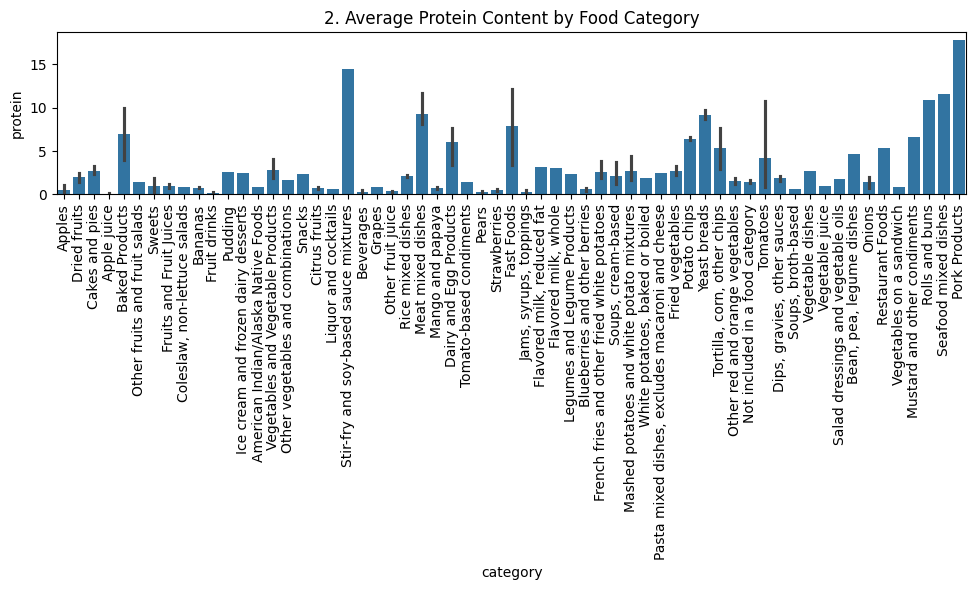

In [15]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='category', y='protein', data=df, estimator='mean')
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Average Protein Content by Food Category')
show_fig()
plot_no += 1


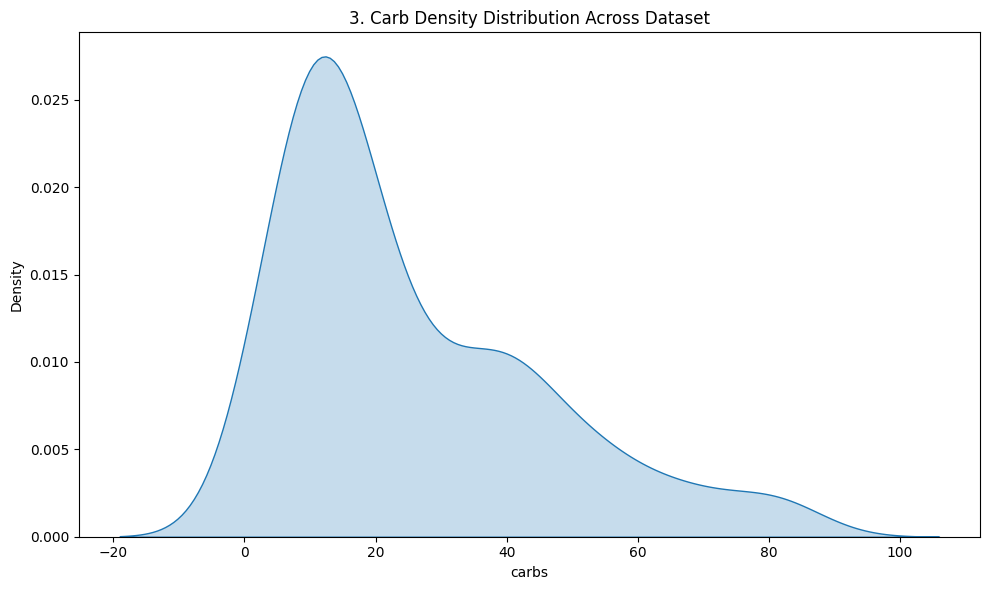

In [16]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(df['carbs'], shade=True)
plt.title(f'{plot_no}. Carb Density Distribution Across Dataset')
show_fig()
plot_no += 1


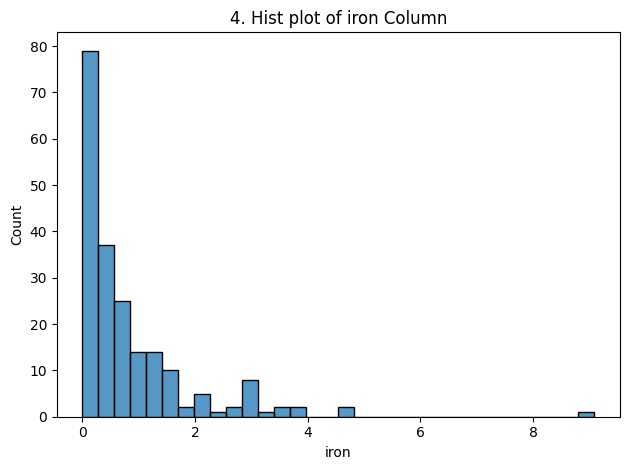

In [17]:
sns.histplot(df['iron'])
plt.title(f'{plot_no}. Hist plot of iron Column')
show_fig()
plot_no += 1

# Linear Regression Prediction

## Import Sklearn Liebrarys

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Prepare the data for prediction

In [19]:
X = df[['protein', 'carbs', 'fat', 'iron', 'vitamin_c']]
y = df['calories']

## Splitting into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize and Train Linear Regression model

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predict Value

In [22]:
y_pred = model.predict(X_test)

## Check Accuracy Score

In [23]:
model.score(X_test, y_test)*100

37.63166110564363

## Evaluate the model

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression Model Performance:')
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Linear Regression Model Performance:
Mean Squared Error (MSE): 71558.20640587142
R-squared (R2): 0.3763166110564363


## Plotting the Actual vs Predicted calories

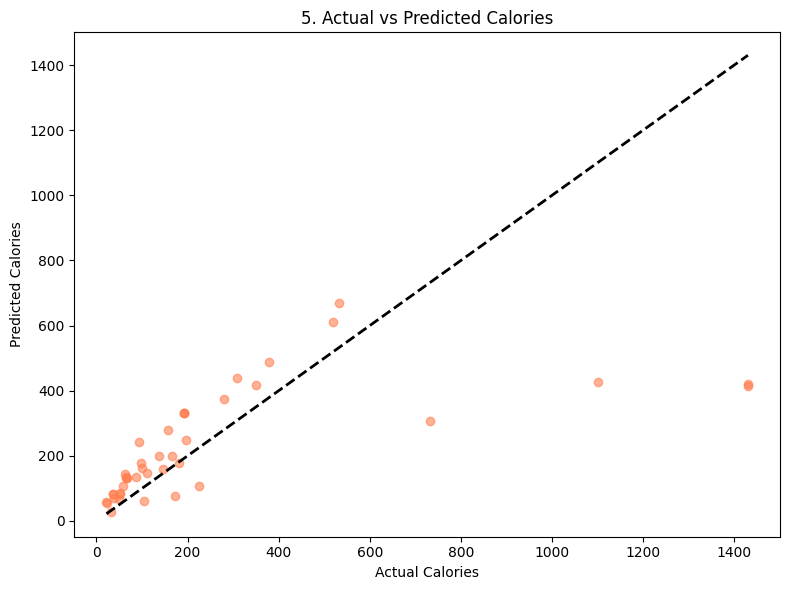

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title(f'{plot_no}. Actual vs Predicted Calories')
plt.tight_layout()
show_fig()
plot_no += 1